In [1]:
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from lib.svx001 import create_position, read_factors, scale_factors

In [3]:
from lib.cux002 import StrategyEvaluate1

In [5]:
method = 'bicso0'
instruments = 'rbb'
task_id = '113001'
period = 5
name = 'linear'

In [6]:
strategy_settings = {'commission': 0.0001, 'slippage': 0, 'size': 10}

In [7]:
predict_data = read_factors(method=method,
                                instruments=instruments,
                                task_id=task_id,
                                period=period,
                                name=name)
predict_data.head()

,trade_time,code,predict,nxt1_ret_5h
4,2024-09-04 09:45:00,RB,-5.917475,0.000621
9,2024-09-04 09:50:00,RB,-5.689486,0.000697
14,2024-09-04 09:55:00,RB,-5.603754,0.000195
19,2024-09-04 10:00:00,RB,-7.512174,-0.001021
24,2024-09-04 10:05:00,RB,-7.474522,-0.000899


In [8]:
scale_factors(predict_data,
                  method='roll_zscore',
                  win=240,
                  factor_name='predict')

In [37]:
signal_method = 'simple_signal'
signal_params = {'roll_num':24, 'threshold':0.8}
strategy_method = None#'trailing_atr_strategy'
strategy_params = None#{'atr_period':14,'atr_multiplier':6, 'max_volume':1}
#signal_method = 'quantile_signal'
#signal_params = {'roll_num':20, 'threshold':0.7}

In [38]:
pos_data, total_data2 = create_position(predict_data=predict_data,
                    signal_method=signal_method,
                    signal_params=signal_params,
                    strategy_method=strategy_method,
                    strategy_params=strategy_params)

In [39]:
pos_data = pos_data.stack()
pos_data.name = 'signal'
total_data2 = total_data2.stack()

new_data = pd.concat([total_data2,pos_data],axis=1).reset_index()

In [40]:
new_data

,trade_time,code,predict,nxt1_ret_5h,transformed,signal
0,2024-09-04 09:45:00,RB,-5.917475,0.000621,NaN,0
1,2024-09-04 09:50:00,RB,-5.689486,0.000697,NaN,0
2,2024-09-04 09:55:00,RB,-5.603754,0.000195,NaN,0
3,2024-09-04 10:00:00,RB,-7.512174,-0.001021,NaN,0
4,2024-09-04 10:05:00,RB,-7.474522,-0.000899,NaN,0
...,...,...,...,...,...,...
8571,2025-03-14 22:40:00,RB,-7.639696,-0.000691,0.060458,0
8572,2025-03-14 22:45:00,RB,-6.301978,-0.000974,0.310756,0
8573,2025-03-14 22:50:00,RB,-6.892264,0.000206,0.198698,0
8574,2025-03-14 22:55:00,RB,-8.073692,0.000305,-0.021080,0


In [41]:
from lib.cux001 import FactorEvaluate1

In [42]:
evaluate1 = FactorEvaluate1(factor_data=new_data,
                                factor_name='signal',
                                ret_name='nxt1_ret_{0}h'.format(period),
                                fee=strategy_settings['commission'],
                                scale_method='raw',
                                expression=name)

In [43]:
evaluate1.run()

{'total_ret': -0.38832849957592974,
 'avg_ret': -5.661330893862251e-05,
 'max_dd': -0.3895163039142139,
 'calmar': -0.9969505658008458,
 'sharpe1': -0.04783189082849787,
 'sharpe2': -5.209795721680375,
 'turnover': 0.8299906716417911,
 'win_rate': 0.23332555970149255,
 'profit_ratio': 0.805116195308108,
 'ic_mean': 0.023762049683314797,
 'ic_std': 0.0730941909002092,
 'ic_ir': 0.32508807321987593,
 'factor_autocorr': -0.19664645852762358,
 'ret_autocorr': 0.015824625765120705}

In [15]:
evaluate1.run()

{'total_ret': -0.3197055334330524,
 'avg_ret': -4.36255922499943e-05,
 'max_dd': -0.3281799661026694,
 'calmar': -0.974177483256349,
 'sharpe1': -0.027138899540067624,
 'sharpe2': -2.4972610234337775,
 'turnover': 0.6971781716417911,
 'win_rate': 0.4791277985074627,
 'profit_ratio': 0.9159838766057069,
 'ic_mean': 0.021562772482924757,
 'ic_std': 0.0642413611112462,
 'ic_ir': 0.33565248478444737,
 'factor_autocorr': 0.005377240407850759,
 'ret_autocorr': 0.015824625765120705}

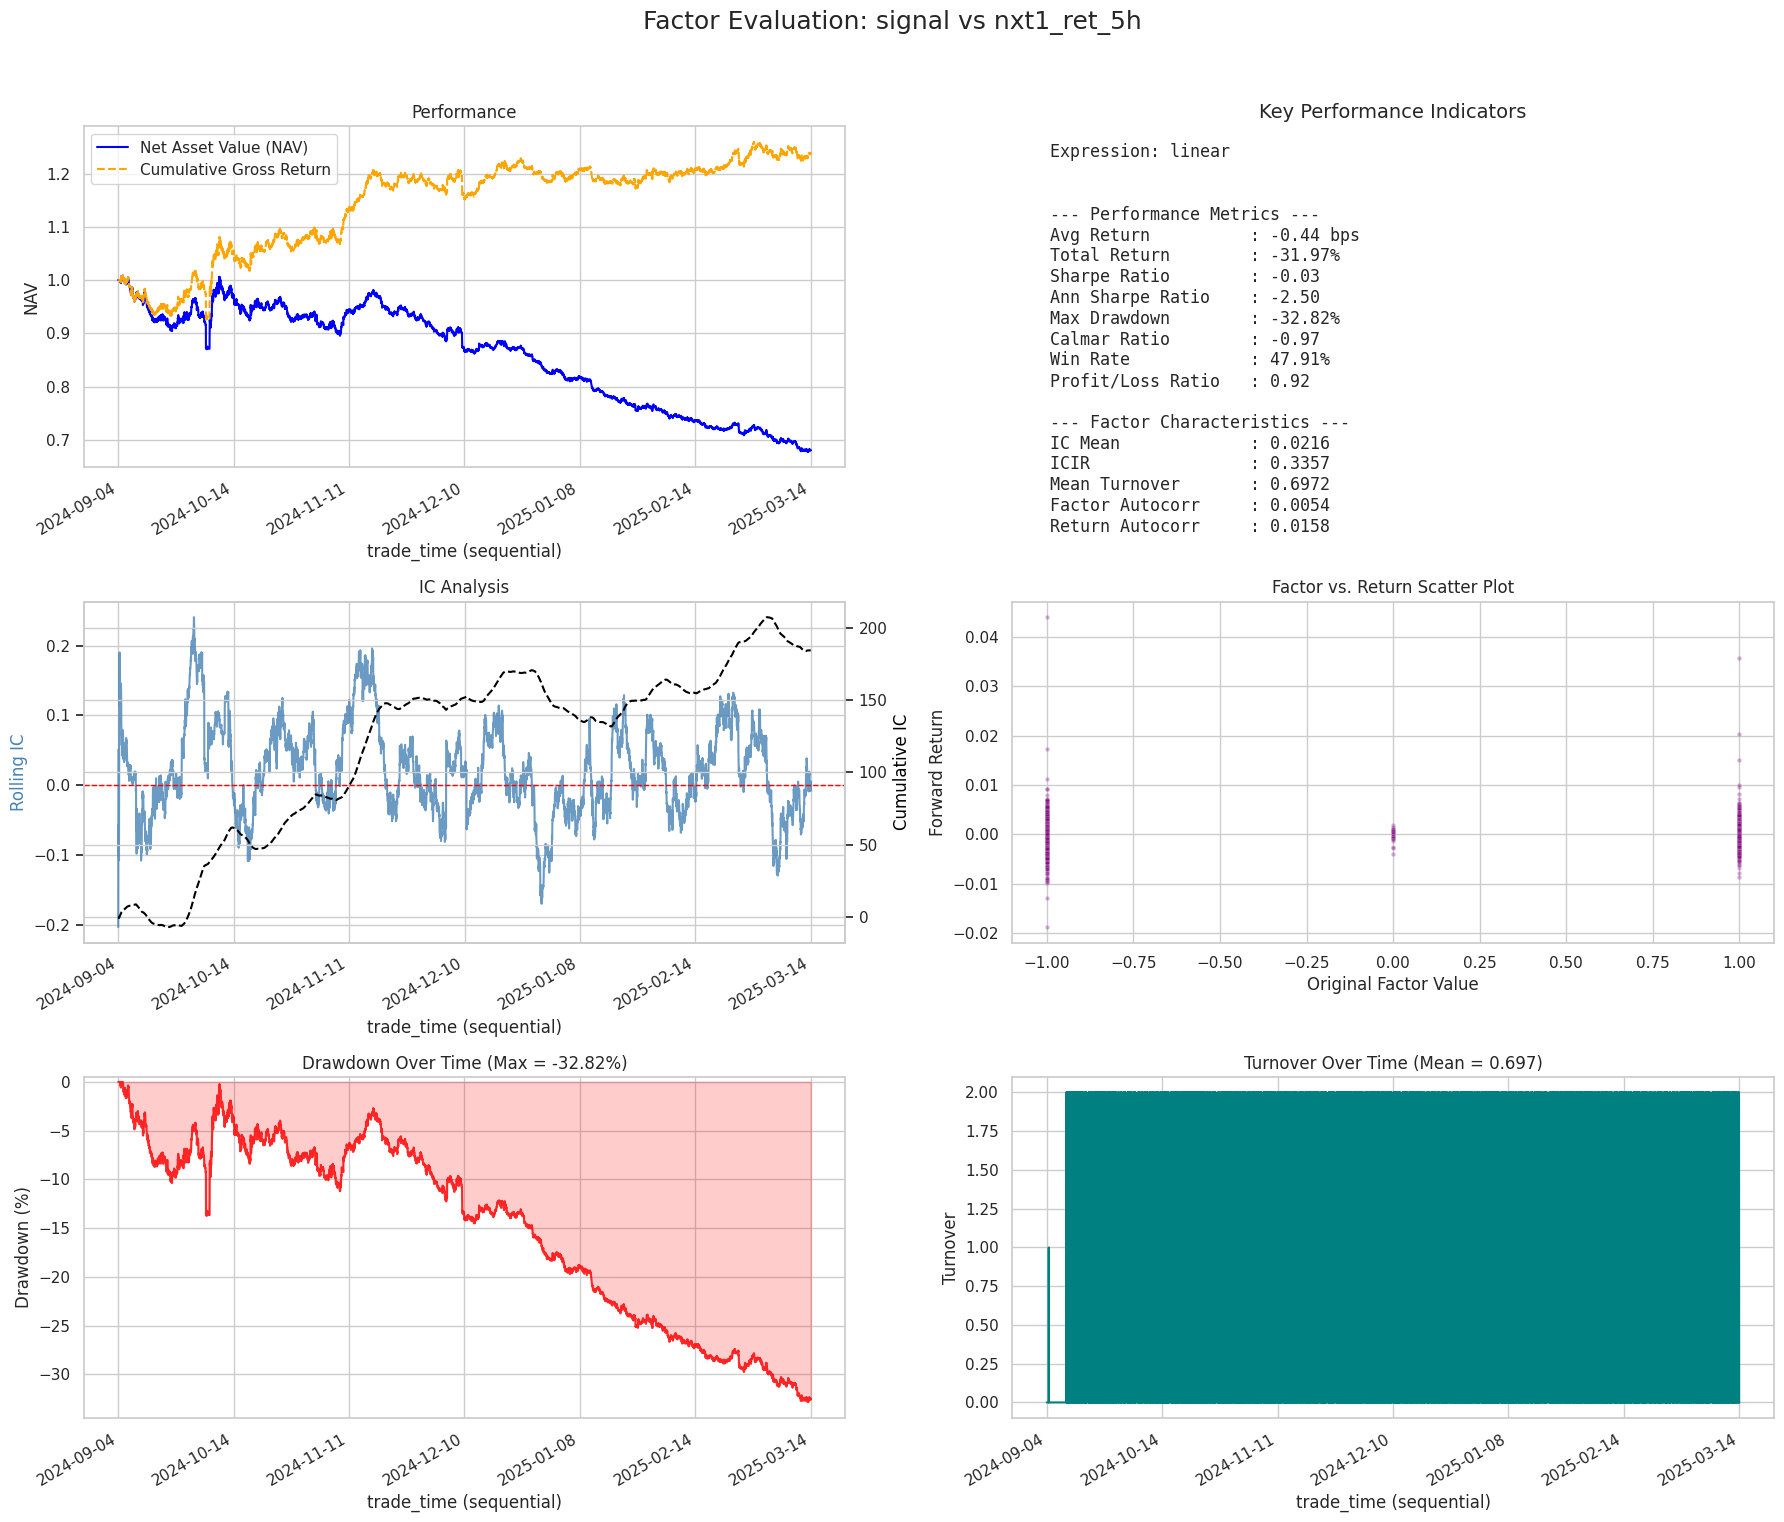

In [15]:
evaluate1.plot_results()